In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [16]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [18]:
df.isna().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [25]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [52]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


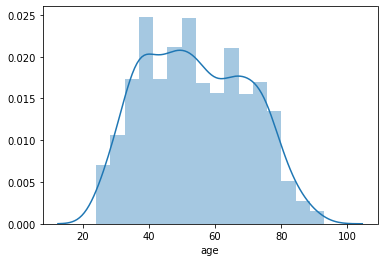

In [30]:
sns.distplot(df['age'])

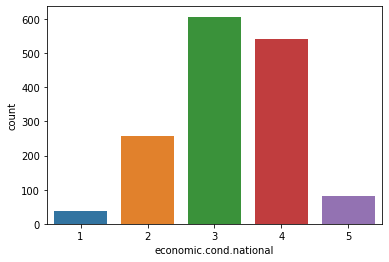

In [26]:
sns.countplot(df['economic.cond.national'])

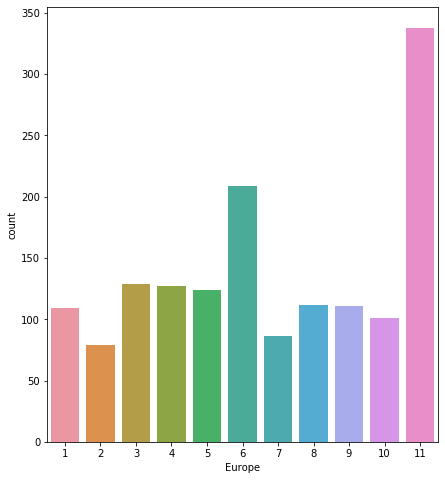

In [48]:
plt.figure(figsize=[7,8])
sns.countplot(df['Europe'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a40a75f50>],
      dtype=object)

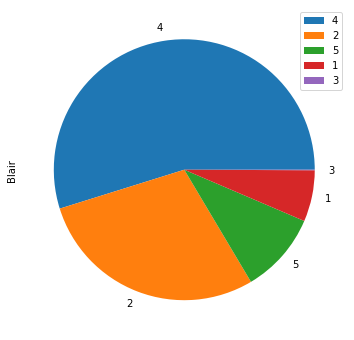

In [38]:
df.Blair.value_counts().to_frame().plot.pie(subplots=True, figsize=(11, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a41190590>],
      dtype=object)

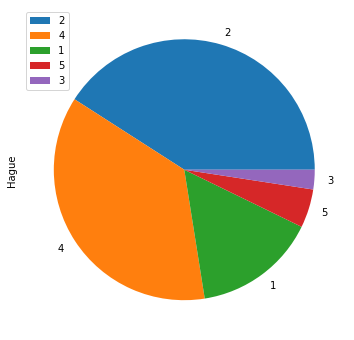

In [42]:
df.Hague.value_counts().to_frame().plot.pie(subplots=True, figsize=(11, 6))

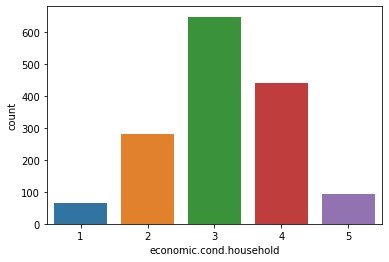

In [45]:
sns.countplot(df['economic.cond.household'])

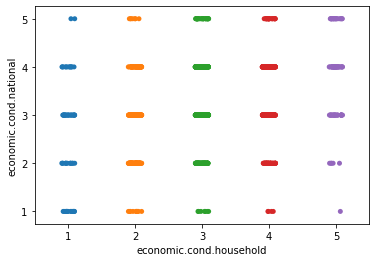

In [35]:
sns.stripplot(df['economic.cond.household'], df['economic.cond.national'])

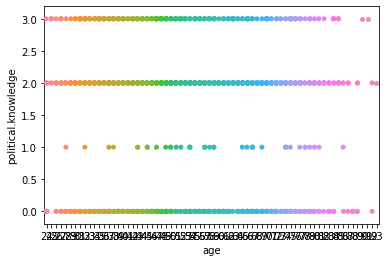

In [36]:
sns.stripplot(df['age'], df['political.knowledge'])

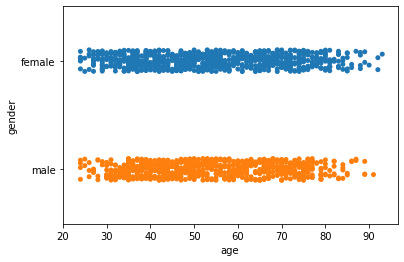

In [37]:
sns.stripplot(df['age'], df['gender'])

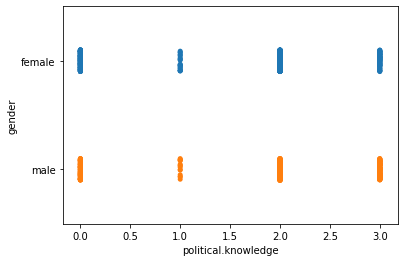

In [39]:
sns.stripplot(df['political.knowledge'], df['gender'])

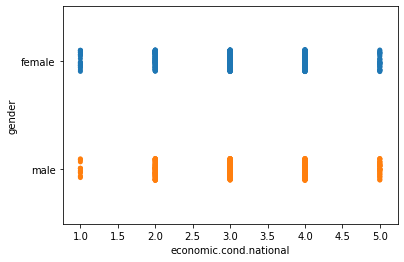

In [41]:

sns.stripplot(df['economic.cond.national'], df['gender'])

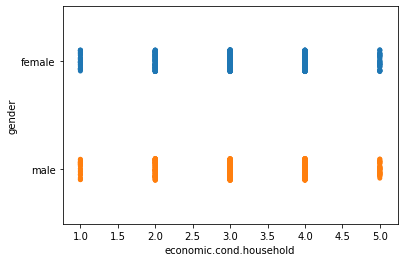

In [42]:
sns.stripplot(df['economic.cond.household'], df['gender'])

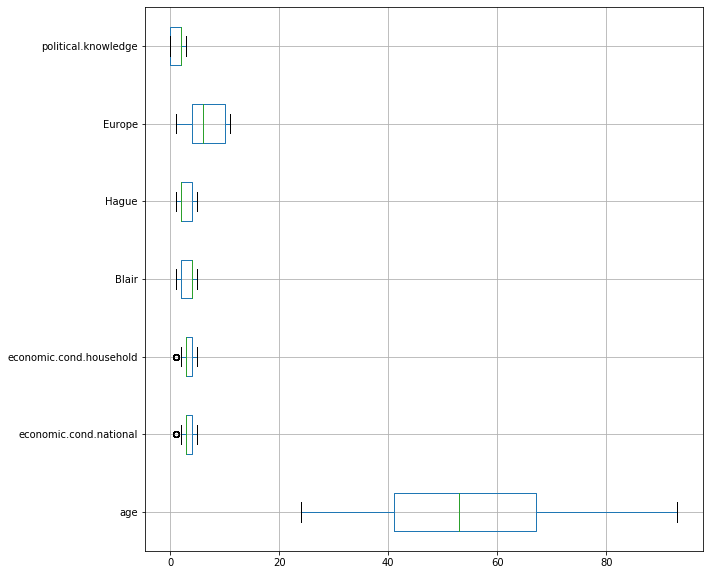

In [52]:
plt.figure(figsize=(10,10))
df.iloc[:,1:8].boxplot(vert=0)

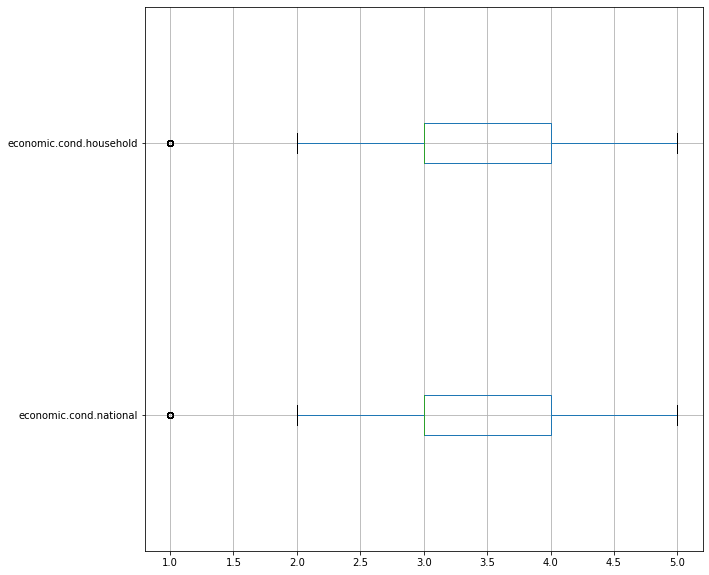

In [53]:
plt.figure(figsize=(10,10))
df.iloc[:,2:4].boxplot(vert=0)

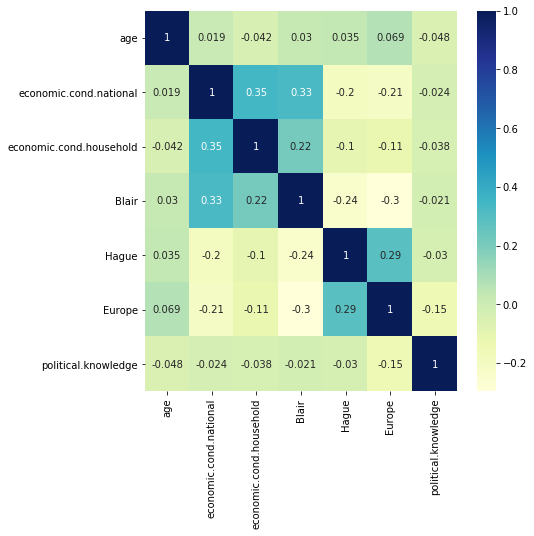

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

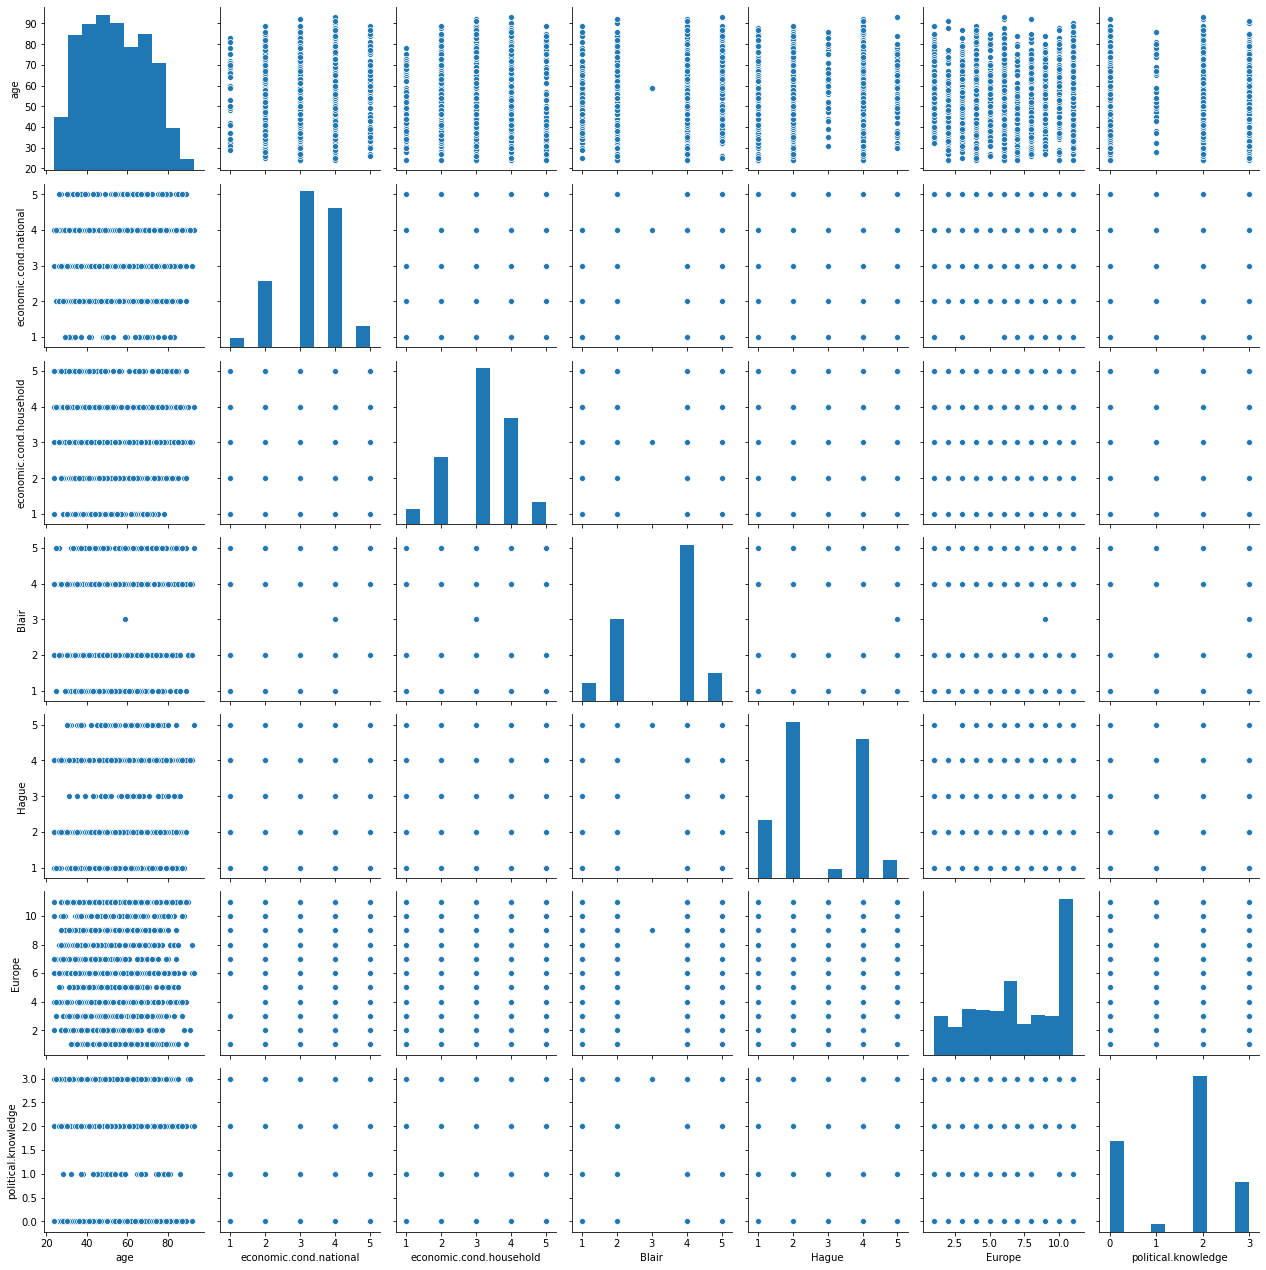

In [57]:
sns.pairplot(df)

In [58]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [58]:
df['vote']= pd.Categorical(df['vote']).codes

In [59]:
df['gender']= pd.Categorical(df['gender']).codes

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


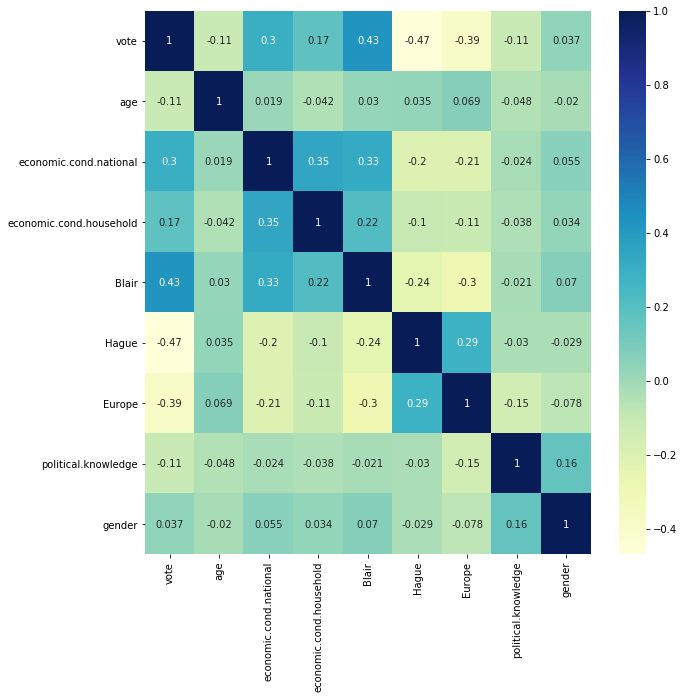

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [9]:
X = df.drop('vote', axis=1)
y=df['vote']

In [67]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: vote, Length: 1525, dtype: int8

In [197]:
df.vote.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [99]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report

In [100]:
def getRocCurve(labels,data,model):
    rf_fpr, rf_tpr,_=roc_curve(labels,model.predict_proba(data)[:,1])
    plt.figure(figsize=(12,7))
    plt.plot(rf_fpr,rf_tpr, marker='x', label='Naive bayes')
    plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    return plt,roc_auc_score(labels,model.predict_proba(data)[:,1])
#     plt.show()
#     print('Area under Curve is', roc_auc_score(labels,model.predict_proba(data)[:,1]))

### LDA

In [91]:
## Performance Matrix on train data set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
pred_class = lda.predict(X_train)
confusion_matrix(y_train, pred_class)
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



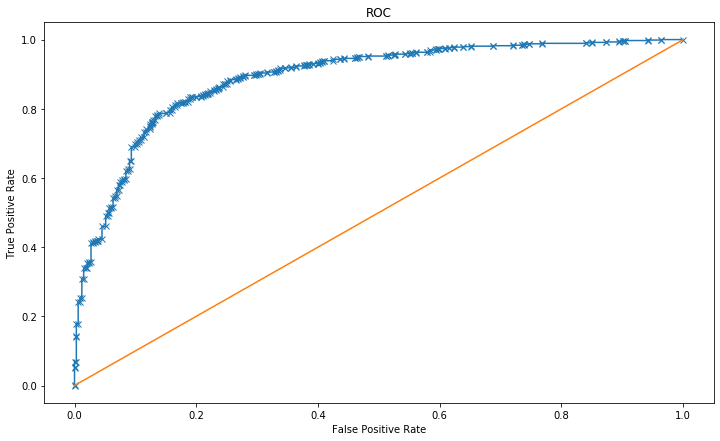

Area under Curve is 0.8892242439144332


In [108]:
# rf_fpr, rf_tpr,_=roc_curve(y_train,lda.predict_proba(X_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='LDA')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
plt,roc_score=getRocCurve(y_train,X_train,lda)
plt.show()
print('Area under Curve is', roc_score)

In [110]:
pred_class = lda.predict(X_test)
confusion_matrix(y_test, pred_class)
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



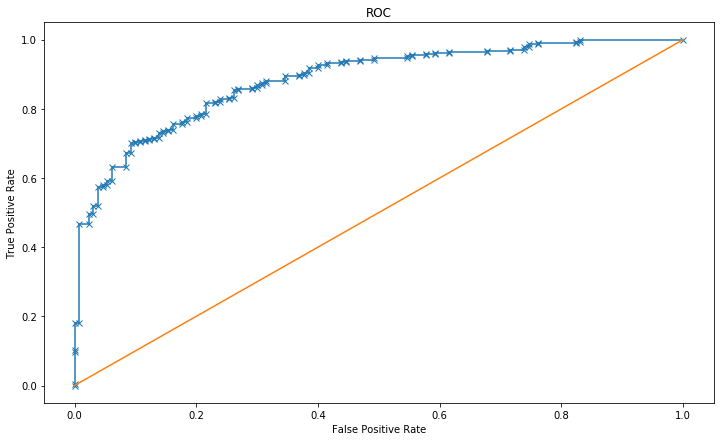

Area under Curve is 0.8837711069418386


In [112]:
plt,roc_score=getRocCurve(y_test,X_test,lda)
plt.show()
print('Area under Curve is', roc_score)

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [116]:
y_predict = model.predict(X_train)
# print(confusion_matrix(y_train, y_predict))
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



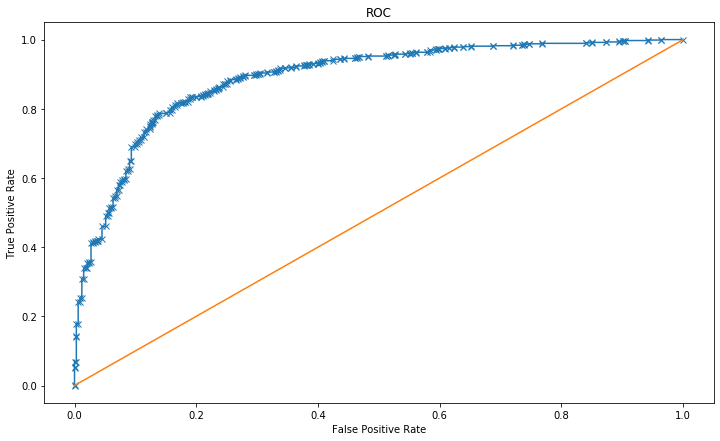

Area under Curve is 0.8892242439144332


In [117]:
plt,roc_score=getRocCurve(y_train,X_train,lda)

# rf_fpr, rf_tpr,_=roc_curve(y_train,lda.predict_proba(X_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
plt.show()
print('Area under Curve is', roc_score)

In [118]:

y_predict = lgmodel.predict(X_test)
model_score = lgmodel.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



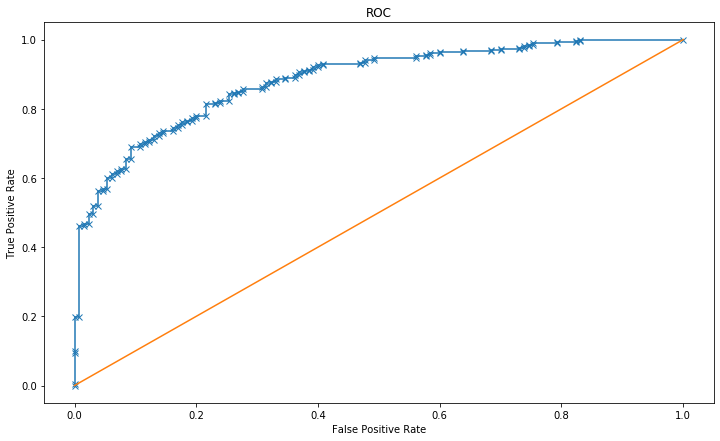

Area under Curve is 0.8825046904315197


In [119]:
# from sklearn.metrics import roc_curve,roc_auc_score
# rf_fpr, rf_tpr,_=roc_curve(y_train,lgmodel.predict_proba(X_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
plt,roc_score=getRocCurve(y_test,X_test,lgmodel)
plt.show()
print('Area under Curve is', roc_score)

### Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [121]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [122]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



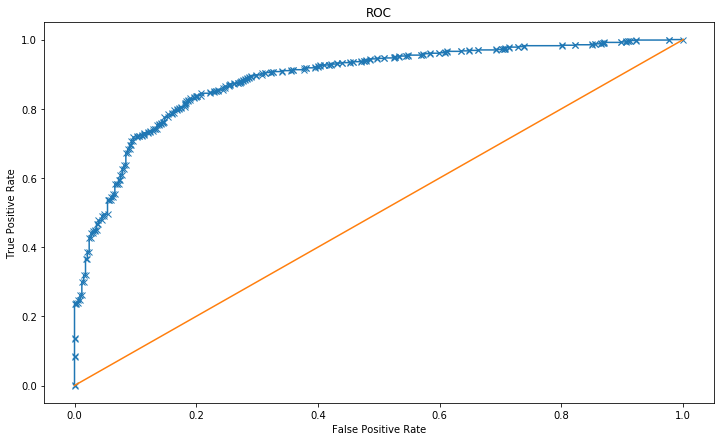

Area under Curve is 0.8864703712810426


In [124]:
# rf_fpr, rf_tpr,_=roc_curve(y_train,NB_model.predict_proba(y_train)[:,1])
# plt.figure(figsize=(12,7))
# plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')

plt,roc_score=getRocCurve(y_train,X_train,NB_model)
plt.show()
print('Area under Curve is', roc_score)

In [125]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



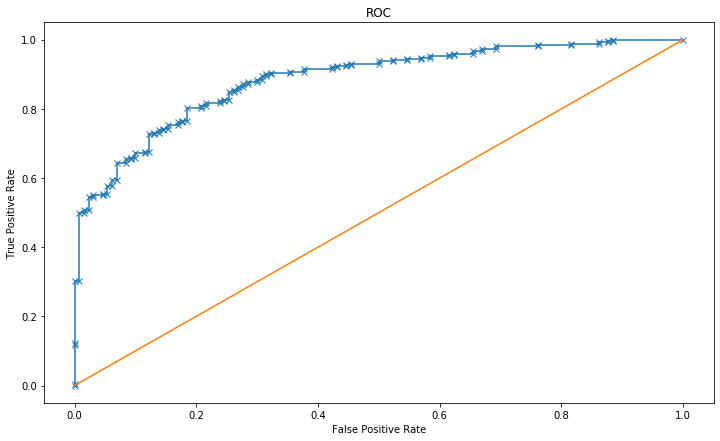

Area under Curve is 0.8845450281425891


In [126]:
plt,roc_score=getRocCurve(y_test,X_test,NB_model)
plt.show()
print('Area under Curve is', roc_score)

### SVM Model

In [133]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [134]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7835051546391752
[[135 197]
 [ 34 701]]
              precision    recall  f1-score   support

           0       0.80      0.41      0.54       332
           1       0.78      0.95      0.86       735

    accuracy                           0.78      1067
   macro avg       0.79      0.68      0.70      1067
weighted avg       0.79      0.78      0.76      1067



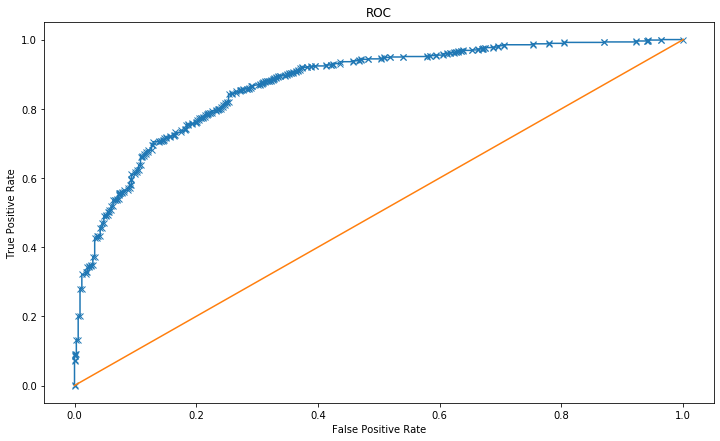

Area under Curve is 0.8704143103024344


In [136]:
plt,roc_score=getRocCurve(y_train,X_train,SVM_model)
plt.show()
print('Area under Curve is', roc_score)

In [138]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[ 50  80]
 [ 18 310]]
              precision    recall  f1-score   support

           0       0.74      0.38      0.51       130
           1       0.79      0.95      0.86       328

    accuracy                           0.79       458
   macro avg       0.77      0.66      0.68       458
weighted avg       0.78      0.79      0.76       458



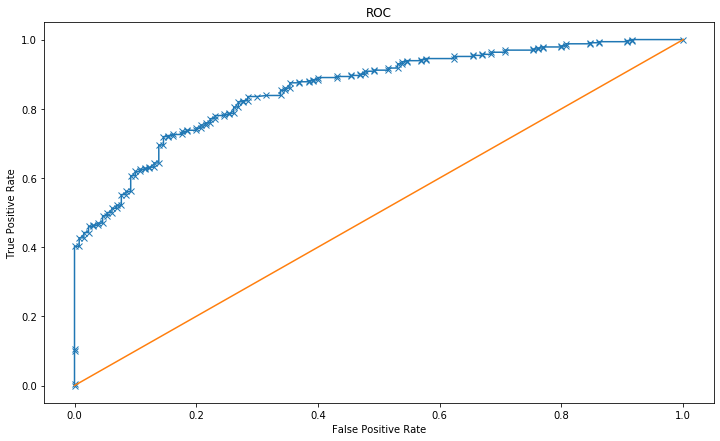

Area under Curve is 0.8575515947467167


In [139]:
plt,roc_score=getRocCurve(y_test,X_test,SVM_model)
plt.show()
print('Area under Curve is', roc_score)

### KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [142]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8537956888472352
[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



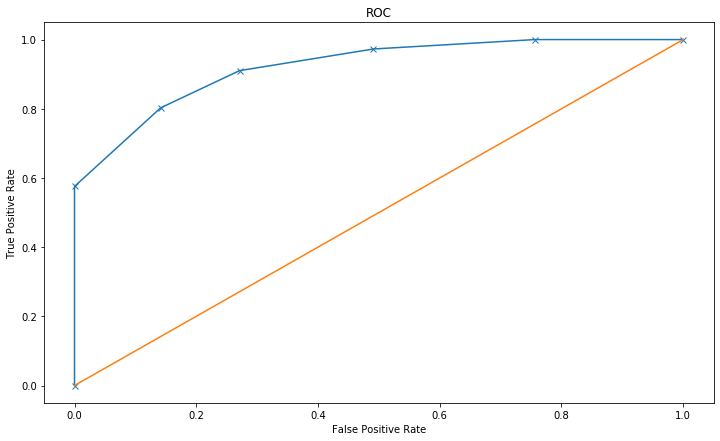

Area under Curve is 0.920928612408819


In [143]:
plt,roc_score=getRocCurve(y_train,X_train,KNN_model)
plt.show()
print('Area under Curve is', roc_score)

In [144]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



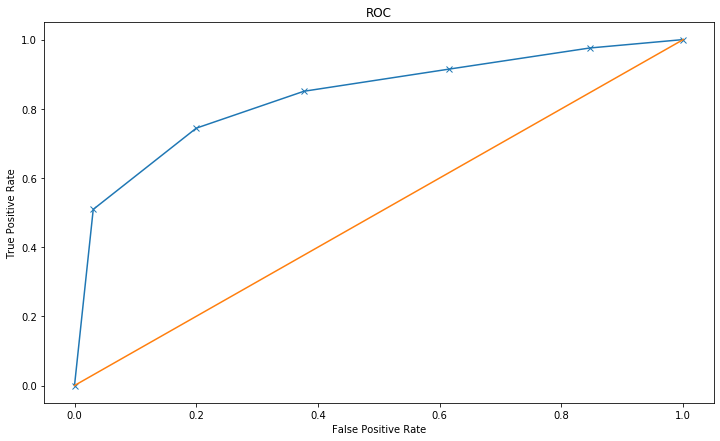

Area under Curve is 0.8354596622889305


In [145]:
plt,roc_score=getRocCurve(y_test,X_test,KNN_model)
plt.show()
print('Area under Curve is', roc_score)

### Random Forest

In [146]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [147]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



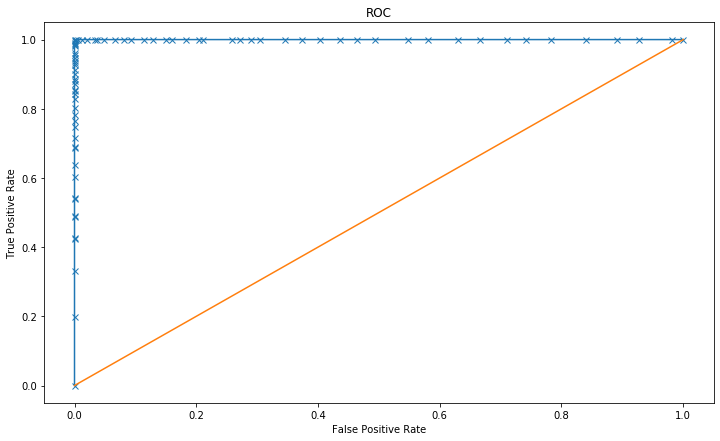

Area under Curve is 0.999997950987624


In [148]:
plt,roc_score=getRocCurve(y_train,X_train,RF_model)
plt.show()
print('Area under Curve is', roc_score)

In [150]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



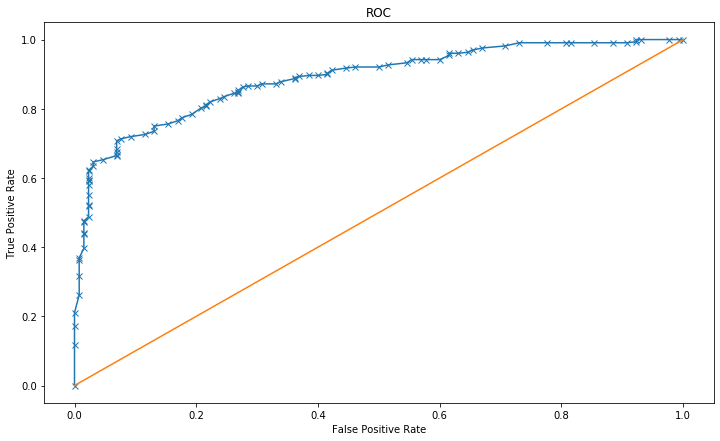

Area under Curve is 0.8873475609756096


In [151]:
plt,roc_score=getRocCurve(y_test,X_test,RF_model)
plt.show()
print('Area under Curve is', roc_score)

### Bagging

In [152]:
from sklearn.ensemble import BaggingClassifier
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [156]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



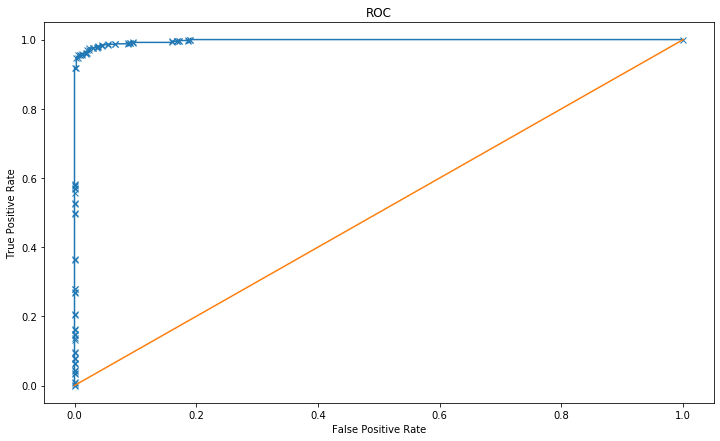

Area under Curve is 0.9971252356364232


In [157]:
plt,roc_score=getRocCurve(y_train,X_train,Bagging_model)
plt.show()
print('Area under Curve is', roc_score)

In [158]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



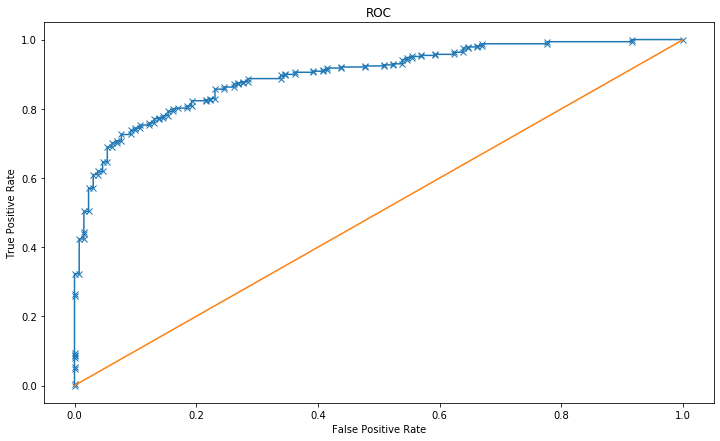

Area under Curve is 0.8967518761726079


In [159]:
plt,roc_score=getRocCurve(y_test,X_test,Bagging_model)
plt.show()
print('Area under Curve is', roc_score)

### Smote

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [104]:
X_train_res.shape


(1470, 8)

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [163]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [164]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.827891156462585
[[600 135]
 [118 617]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       735
           1       0.82      0.84      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



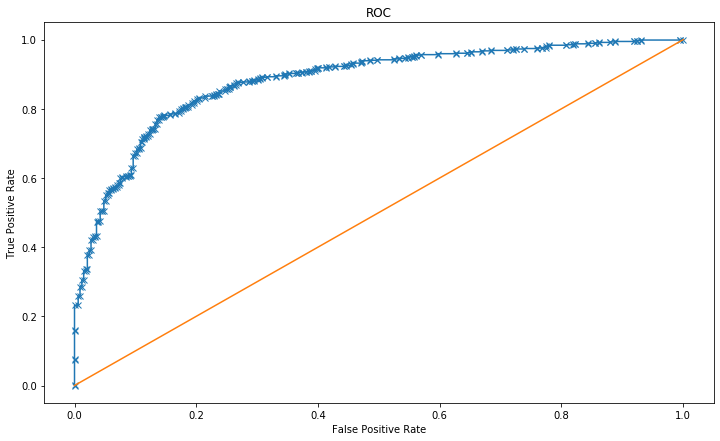

Area under Curve is 0.8812167035488895


In [165]:
NB,roc_score=getRocCurve(y_train,X_train,NB_SM_model)
plt.show()
print('Area under Curve is', roc_score)

In [166]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[103  27]
 [ 66 262]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.80       458



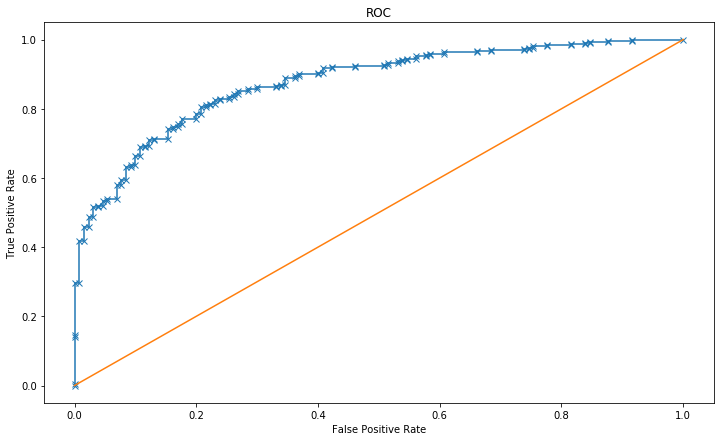

Area under Curve is 0.8752814258911821


In [167]:
plt,roc_score=getRocCurve(y_test,X_test,NB_SM_model)
plt.show()
print('Area under Curve is', roc_score)

### XGBOOST

In [168]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(X_train_res)
model_score = XGB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8972789115646258
[[676  59]
 [ 92 643]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       735
           1       0.92      0.87      0.89       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



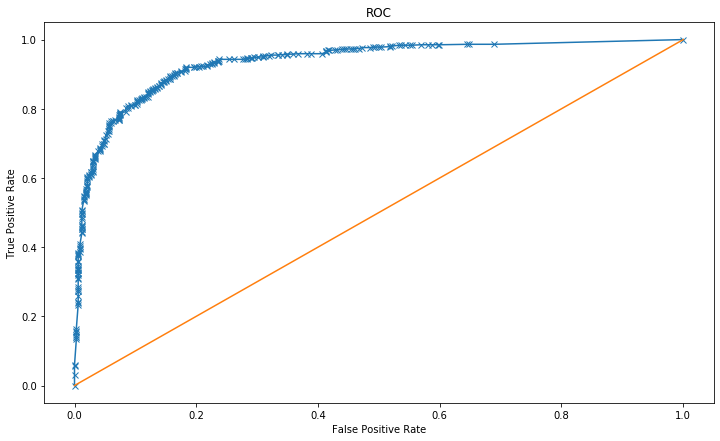

Area under Curve is 0.9355442176870749


In [170]:
plt,roc_score=getRocCurve(y_train,X_train,XGB_SM_model)
plt.show()
print('Area under Curve is', roc_score)

In [171]:
## Performance Matrix on test data set
y_test_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[103  27]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



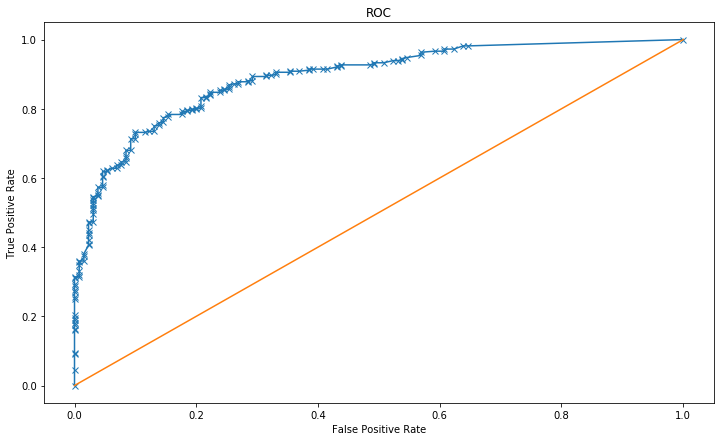

Area under Curve is 0.8912523452157598


In [172]:
plt,roc_score=getRocCurve(y_test,X_test,XGB_SM_model)
plt.show()
print('Area under Curve is', roc_score)

### KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [174]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8925170068027211
[[699  36]
 [122 613]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       735
           1       0.94      0.83      0.89       735

    accuracy                           0.89      1470
   macro avg       0.90      0.89      0.89      1470
weighted avg       0.90      0.89      0.89      1470



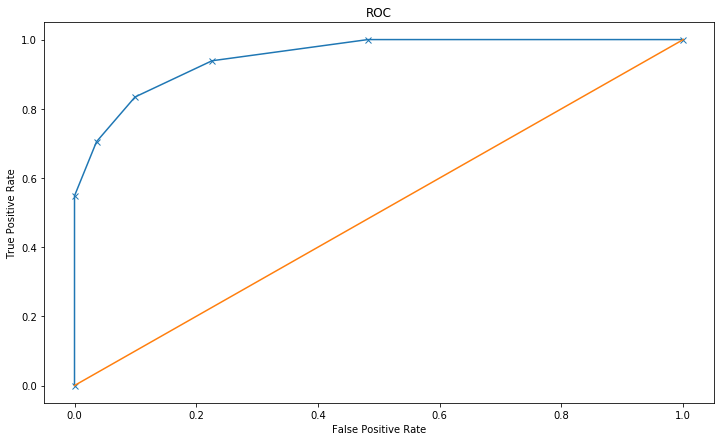

Area under Curve is 0.949704942217851


In [175]:
plt,roc_score=getRocCurve(y_train,X_train,KNN_SM_model)
plt.show()
print('Area under Curve is', roc_score)

In [177]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7532751091703057
[[100  30]
 [ 83 245]]
              precision    recall  f1-score   support

           0       0.55      0.77      0.64       130
           1       0.89      0.75      0.81       328

    accuracy                           0.75       458
   macro avg       0.72      0.76      0.73       458
weighted avg       0.79      0.75      0.76       458



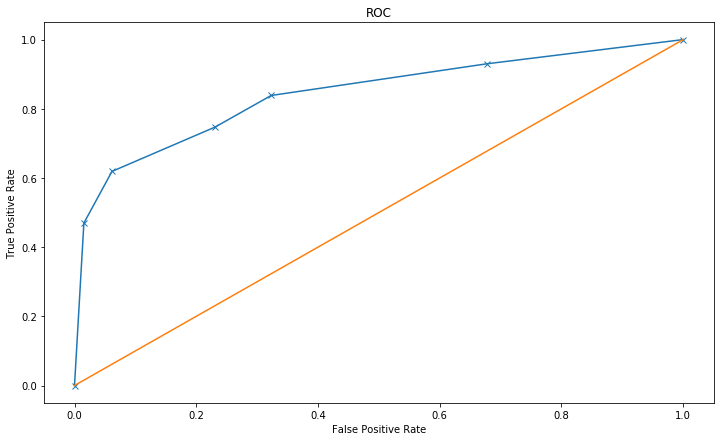

Area under Curve is 0.8420731707317073


In [178]:
plt,roc_score=getRocCurve(y_test,X_test,KNN_SM_model)
plt.show()
print('Area under Curve is', roc_score)

### SVM

In [182]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1,probability=True)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [183]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(X_train_res)
model_score = SVM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8020408163265306
[[592 143]
 [148 587]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       735
           1       0.80      0.80      0.80       735

    accuracy                           0.80      1470
   macro avg       0.80      0.80      0.80      1470
weighted avg       0.80      0.80      0.80      1470



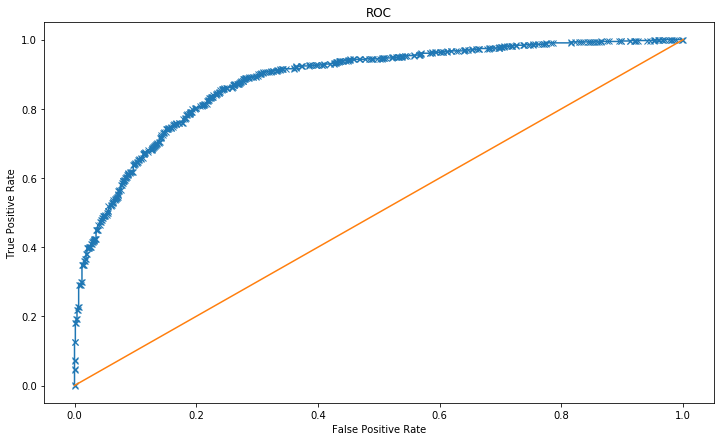

Area under Curve is 0.8808450182794206


In [199]:
plt,roc_score=getRocCurve(y_train_res,X_train_res,SVM_SM_model)
plt.show()
print('Area under Curve is', roc_score)

In [186]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(X_test)
model_score = SVM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7816593886462883
[[106  24]
 [ 76 252]]
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       130
           1       0.91      0.77      0.83       328

    accuracy                           0.78       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.78      0.79       458



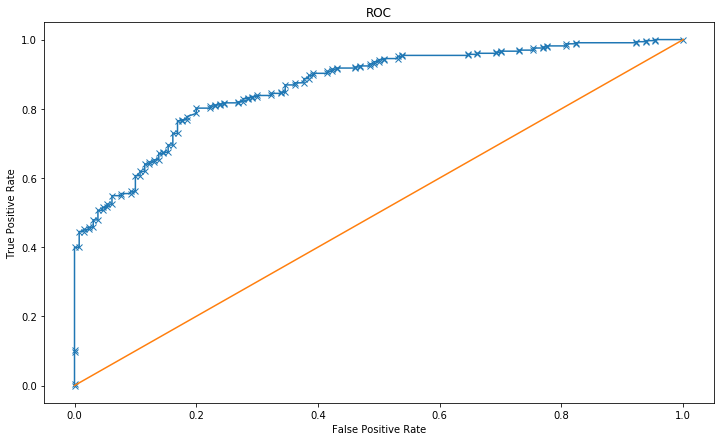

Area under Curve is 0.8662992495309567


In [187]:
plt,roc_score=getRocCurve(y_test,X_test,SVM_SM_model)
plt.show()
print('Area under Curve is', roc_score)

In [242]:

RF_model_SM=RandomForestClassifier(n_estimators=100,random_state=1)

RF_model_SM.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [243]:
## Performance Matrix on train data set
y_train_predict = RF_model_SM.predict(X_train_res)
model_score =RF_model_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.998639455782313
[[733   2]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



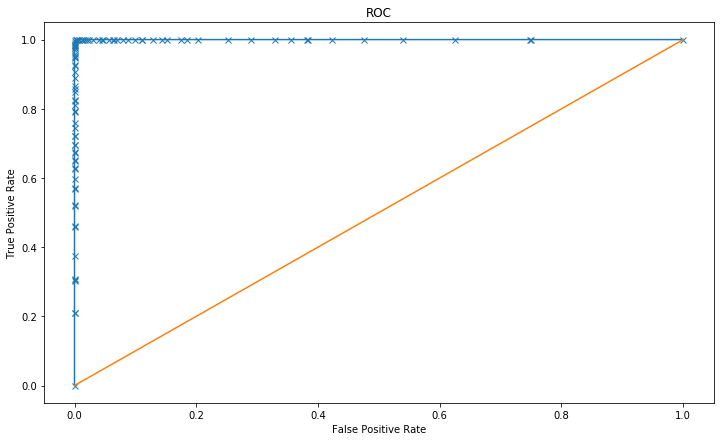

Area under Curve is 0.9999925956777269


In [244]:
plt,roc_score=getRocCurve(y_train_res,X_train_res,RF_model_SM)
plt.show()
print('Area under Curve is', roc_score)

In [246]:
## Performance Matrix on test data set
y_test_predict = RF_model_SM.predict(X_test)
model_score = RF_model_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[100  30]
 [ 53 275]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       130
           1       0.90      0.84      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.82       458



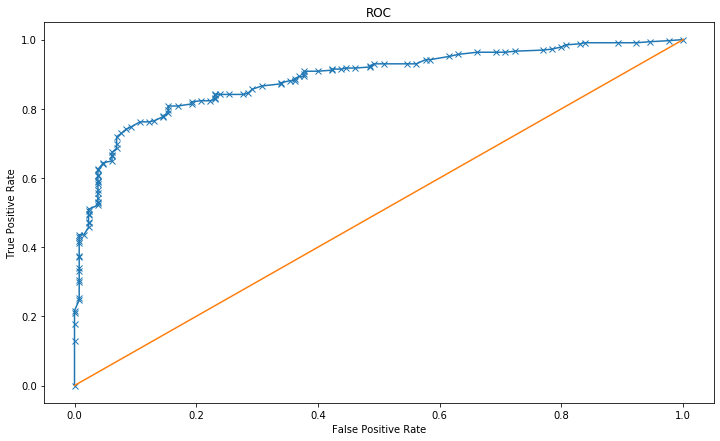

Area under Curve is 0.8864446529080675


In [247]:
plt,roc_score=getRocCurve(y_test,X_test,RF_model_SM)
plt.show()
print('Area under Curve is', roc_score)

In [231]:
nb_train_fpr, nb_train_tpr,_=roc_curve(y_train_res,NB_SM_model.predict_proba(X_train_res)[:,1])
nb_test_fpr, nb_test_tpr,_=roc_curve(y_test,NB_SM_model.predict_proba(X_test)[:,1])

xg_train_fpr, xg_train_tpr,_=roc_curve(y_train_res,XGB_SM_model.predict_proba(X_train_res)[:,1])
xg_test_fpr, xg_test_tpr,_=roc_curve(y_test,XGB_SM_model.predict_proba(X_test)[:,1])

knn_train_fpr, knn_train_tpr,_=roc_curve(y_train_res,KNN_SM_model.predict_proba(X_train_res)[:,1])
knn_test_fpr, knn_test_tpr,_=roc_curve(y_test,KNN_SM_model.predict_proba(X_test)[:,1])

svm_train_fpr, svm_train_tpr,_=roc_curve(y_train_res,SVM_SM_model.predict_proba(X_train_res)[:,1])
svm_test_fpr, svm_test_tpr,_=roc_curve(y_test,SVM_SM_model.predict_proba(X_test)[:,1])


rf_train_fpr, rf_train_tpr,_=roc_curve(y_train_res,RF_model_SM.predict_proba(X_train_res)[:,1])
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,RF_model_SM.predict_proba(X_test)[:,1])


No handles with labels found to put in legend.


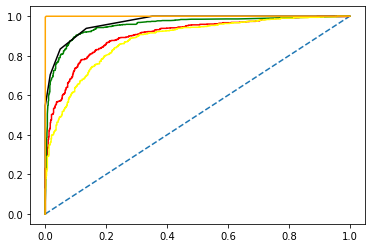

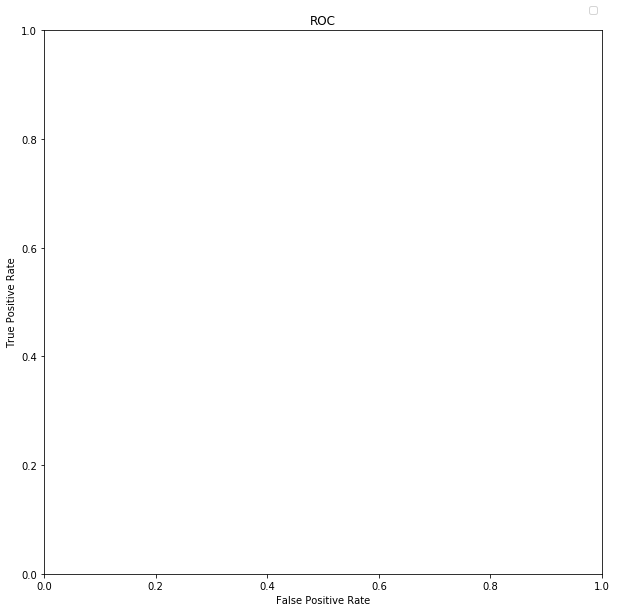

In [251]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_train_fpr, nb_train_tpr,color='red',label="Naive Bayes")
plt.plot(xg_train_fpr,xg_train_tpr,color='green',label="XG Boost")
plt.plot(knn_train_fpr,knn_train_tpr,color='black',label="KNN")
plt.plot(svm_train_fpr,svm_train_tpr,color='yellow',label="SVM")
plt.plot(rf_train_fpr,rf_train_tpr,color='orange',label="RF")plt.figure(figsize=)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

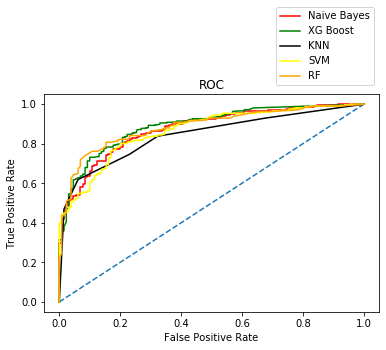

In [234]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_test_fpr, nb_test_tpr,color='red',label="Naive Bayes")
plt.plot(xg_test_fpr,xg_test_tpr,color='green',label="XG Boost")
plt.plot(knn_test_fpr,knn_test_tpr,color='black',label="KNN")
plt.plot(svm_test_fpr,svm_test_tpr,color='yellow',label="SVM")
plt.plot(rf_test_fpr,rf_test_tpr,color='orange',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [235]:
XG_feature=XGB_SM_model.feature_importances_
RF_fetaures=RF_model_SM.feature_importances_
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [238]:
print(pd.DataFrame({'Feature_Importance_RF': RF_fetaures,'Feature_Importance_XG':XG_feature},
                   index=X_test.columns).sort_values(by=['Feature_Importance_RF','Feature_Importance_XG'],ascending=False))



                         Feature_Importance_RF  Feature_Importance_XG
Blair                                 0.186897               0.674187
Europe                                0.183899               0.045186
age                                   0.177202               0.017548
Hague                                 0.171310               0.148775
economic.cond.national                0.094473               0.016589
political.knowledge                   0.080889               0.050196
economic.cond.household               0.075442               0.029549
gender                                0.029888               0.017969


In [252]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.78231293, 0.75510204, 0.82993197, 0.82312925, 0.8707483 ,
       0.84353741, 0.89115646, 0.86394558, 0.86394558, 0.8707483 ])

In [253]:
scores = cross_val_score(XGB_SM_model, X_test, y_test, cv=10)
scores

array([0.80434783, 0.82608696, 0.7826087 , 0.76086957, 0.7826087 ,
       0.80434783, 0.89130435, 0.84782609, 0.84444444, 0.75555556])